# Price-yield graph

Importing numpy to do basic numerical operation and matplotlib to create and manipulate plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot") #GG plot style

Creating a Class with functions to: generate cash flow times, compute full price from the yield, compute clean price from the yield, compute the accrued interest, compute the duration.

In [2]:
class Bond(object):
    def __init__(self, maturity, coupon, frequency):
        self._maturity = maturity
        self._coupon = coupon
        self._frequency = frequency
        
    def flowTimes(self):
        """
        Generates cash flow times
        """
        small = 1e-10
        numPaymentsMinusOne = int(self._maturity * self._frequency - small)
        firstPayment = self._maturity - numPaymentsMinusOne / self._frequency
        return np.linspace(firstPayment,self._maturity,numPaymentsMinusOne+1)
    
    def fullPriceFromYield(self, y):
        """
        Computes dirty price of the bond from the yield
        """
        paymentTimes = Bond.flowTimes(self)
        price = 0.0
        for t in paymentTimes:
            df = 1.0/(1.0 + y/self._frequency)**(t*self._frequency)
            price += (self._coupon / self._frequency ) * df
        price += df
        return price
    
    def cleanPriceFromYield(self, y):
        """
        Computes clean price of the bond from the yield
        """
        cleanPrice = self.fullPriceFromYield(y) - self.accrued()
        return cleanPrice
    
    def accrued(self):
        """
        Computes accrued interest of the bond
        """
        paymentTimes = self.flowTimes()
        accruedPeriod = 1.0/self._frequency - paymentTimes[0]
        return accruedPeriod * self._coupon
    
    def duration(self, y):
        """
        Computes duration of the bond
        """
        paymentTimes = self.flowTimes()
        price = 0.0; df = 1.0; fv = 1.0
        weights = [] #Creating an empty list
        for t in paymentTimes:
            df = 1.0/(1.0 + y/self._frequency)**(t*self._frequency)
            if t == paymentTimes[-1]: #If in the last period, computing the face value + the coupon
                weight = (fv + self._coupon / self._frequency ) * df / Bond.fullPriceFromYield(self,y)
            else: #Otherwise computing only for the coupon
                weight = (self._coupon / self._frequency ) * df / Bond.fullPriceFromYield(self,y)
            weights.append(weight * t) #Appending the values to the weight list
        return np.sum(weights) #Summing the values in the list

#Attributing values to the variables
maturity = 10.2
coupon = 0.05
frequency = 2.0
bond = Bond(maturity,coupon, frequency)
y = 0.05

In [3]:
bond.fullPriceFromYield(y) #Showing the full price

1.0149258620941133

In [5]:
bond.duration(y) #Showing the duration

7.994581142823405

In [6]:
bond.accrued() #Showing the accrued interest

0.015000000000000036

Creating a price-yield plot using the Bond Class (with Yields on the x-axis, 
Prices on the y-axis) for yields ranging from 0 to 20%.
Then Labeling the axes and giving the graph a title.

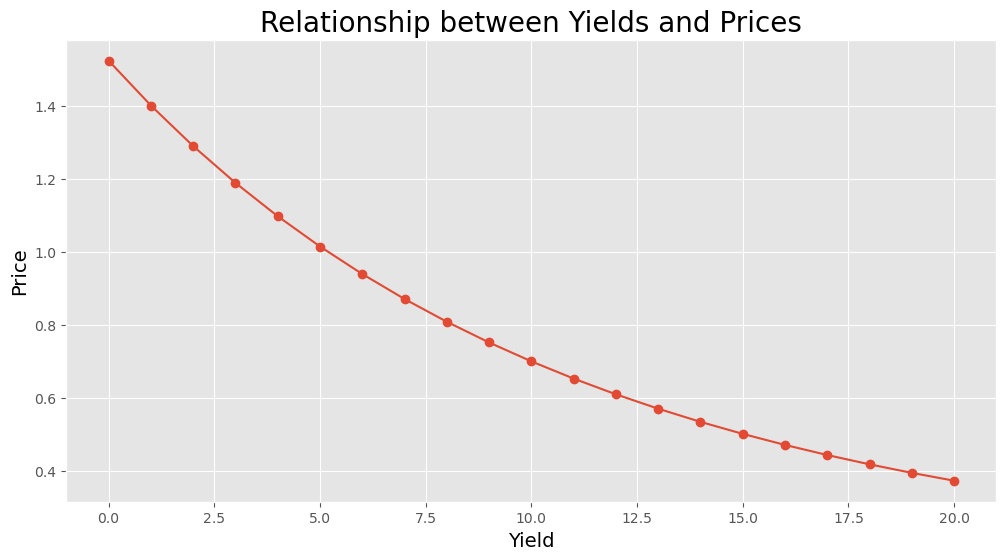

In [7]:
maxYield = 21 #Setting a maximum value
yieldCurve = [bond.fullPriceFromYield(i/100) for i in range(maxYield)]
#This List comprehension code makes in a single line the operation in comments put below

#yieldCurve = []
#for i in range(maxYield): 
#    yields= i/100
#    yieldCurves = bond.fullPriceFromYield(yields)
#    yieldCurve.append(yieldCurves)

plt.figure(figsize=(12, 6)) #Sizing the plot
plt.plot(yieldCurve, "o-") #Selecting marker
plt.xlabel("Yield", size = 14) #Labeling X axis
plt.ylabel("Price", size = 14) #Labeling Y axis
plt.title("Relationship between Yields and Prices", size = 20); #Titling the graph

Creating the same plot using vectorization

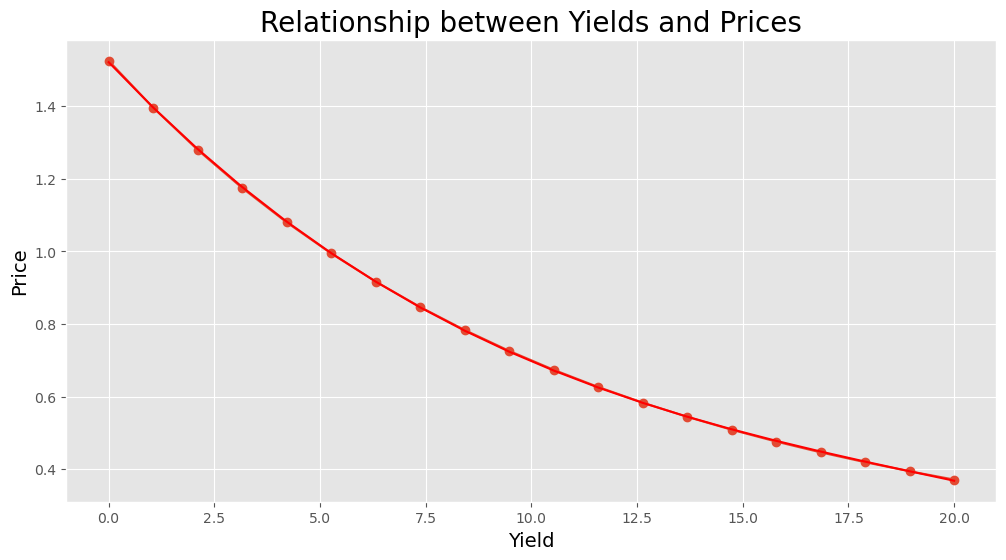

In [8]:
def fitAndPlot(y, price,d):
    """
    Polynomial function for the relationship between yield and price
    """
    coeffs = np.polyfit(y, price, deg=d)            
    ry = np.polyval(coeffs, y)                 
    
    plt.figure(figsize=(12, 6)) #Sizing the plot
    plt.plot(y, price, 'o-') #Selecting marker
    plt.plot(y, ry, 'r') #Select red colour
    plt.xlabel("Yield", size = 14) #Labeling X axis
    plt.ylabel("Price", size = 14) #Labeling Y axis
    plt.title("Relationship between Yields and Prices", size = 20); #Titling the graph
    
yields = np.linspace(0.0,20,20, endpoint = True)/100 #Array of 20 equally spaced points between 0 and 20% 
fitAndPlot(yields*100, bond.fullPriceFromYield(yields), 3) #Showing the plot